In [23]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import pandas as pd
import numpy as np

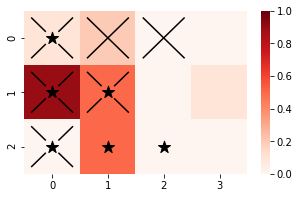

In [83]:
def crossout(points, ax=None, scale=1, **kwargs):
    ax = ax or plt.gca()
    l = np.array([[[1,1],[-1,-1]]])*scale/2.+0.5
    r = np.array([[[-1,1],[1,-1]]])*scale/2.+0.5
    p = np.atleast_3d(points).transpose(0,2,1)
    c = LineCollection(np.concatenate((l+p,r+p), axis=0), **kwargs)
    ax.add_collection(c)
    return c

def crossout_hallow(points, ax=None, scale=1, **kwargs):
    ax = ax or plt.gca()
    l1 = np.array([[[1,1],[0.3,0.3]]])*scale/2.+0.5
    l2 = np.array([[[-0.3,-0.3],[-1,-1]]])*scale/2.+0.5
    r1 = np.array([[[-1,1],[-0.3, 0.3]]])*scale/2.+0.5
    r2 = np.array([[[0.3,-0.3],[1,-1]]])*scale/2.+0.5
    p = np.atleast_3d(points).transpose(0,2,1)
    c = LineCollection(np.concatenate((l1+p,l2+p,r1+p,r2+p), axis=0), **kwargs)
    ax.add_collection(c)
    return c

# Toydata 
df_prop = pd.DataFrame([[0.1, 0.2, 0, 0], [0.9, 0.5, 0, 0.1], [0, 0.5, 0, 0]])
df_assoc = pd.DataFrame([[1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0]], dtype=bool)
df_het = pd.DataFrame([[1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0]], dtype=bool)


fig, ax = plt.subplots(figsize=[5,3])
sns.heatmap(df_prop, annot_kws={'fontsize':16}, fmt='s', cmap='Reds', vmin=0, vmax=1)
# Add cell type associations 
ax.scatter(np.argwhere(df_assoc.values.T)[:,0]+0.5, np.argwhere(df_assoc.values.T)[:,1]+0.5,
           marker='*', color='k', s=160)
# Add heterogeneity for sig associations: hallowed cross
mat_mask = df_het.values*df_assoc.values
crossout_hallow(np.argwhere(mat_mask.T), ax=ax, scale=0.75, color="black")
# Add heterogeneity for non-sig associations: solid cross
mat_mask = df_het.values*(~df_assoc.values)
crossout(np.argwhere(mat_mask.T), ax=ax, scale=0.75, color="black")
plt.show()

array([0, 0, 0, 1, 1, 2])

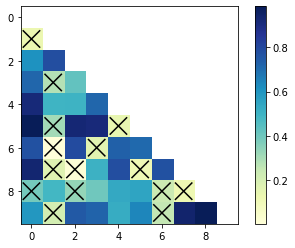

In [31]:
data = np.random.rand(10,10)
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

data_masked = np.ma.array(data, mask=mask)

fig, ax = plt.subplots()
im = ax.imshow(data_masked, cmap="YlGnBu", origin="upper")
fig.colorbar(im)


crossout(np.argwhere(data_masked.T < 0.4), ax=ax, scale=0.8, color="black")


plt.show()

In [32]:
data_masked

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [0.12661231220548197, --, --, --, --, --, --, --, --, --],
        [0.6106813452665741, 0.7828162113305617, --, --, --, --, --, --,
         --, --],
        [0.7198680523034128, 0.2791345988212103, 0.4281854730425696, --,
         --, --, --, --, --, --],
        [0.918277371242602, 0.4999375268232501, 0.5014292026501743,
         0.7175668439185859, --, --, --, --, --, --],
        [0.982500965808896, 0.31273811413064967, 0.9240028047675829,
         0.9135250689803976, 0.14063907572901457, --, --, --, --, --],
        [0.7750251484295115, 0.002033027631517248, 0.7898047431419599,
         0.16074661218353525, 0.7342240158354608, 0.710740987950083, --,
         --, --, --],
        [0.9353261614565802, 0.16809326556157533, 0.010459784204739697,
         0.507018602205434, 0.7824632882670431, 0.11227272314470471,
         0.7770522390102381, --, --, --],
        [0.3927584255547957, 0.48949758918608943, 0.33308141